In [ ]:
import torch 
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

dev = torch.device('cpu')
if torch.cuda.is_available():
    print("CUDA is available, running on GPU")
    dev = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    print("CUDA not available, running on CPU")

class MultiLayerNet(torch.nn.Module):

    def __init__(self, num_input_neurons, num_hidden_neurons, num_output_neurons):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MultiLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(num_input_neurons, num_hidden_neurons)
        self.linear2 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear3 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear4 = torch.nn.Linear(num_hidden_neurons, num_output_neurons)

        torch.nn.init.constant_(self.linear1.bias, 0.)
        torch.nn.init.constant_(self.linear2.bias, 0.)
        torch.nn.init.constant_(self.linear3.bias, 0.)
        torch.nn.init.constant_(self.linear4.bias, 0.)

        torch.nn.init.normal_(self.linear1.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear2.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear3.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear4.weight, mean=0, std=0.1)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """

        y1 = torch.tanh(self.linear1(x))
        y2 = torch.tanh(self.linear2(y1))
        y3 = torch.tanh(self.linear3(y2))
        y = self.linear4(y3)
        return y

CUDA not available, running on CPU


In [ ]:
class IntegrationLoss:
    def __init__(self, numIntType, dim):
        print("Constructor: IntegrationLoss ", numIntType, " in ", dim, " dimension ")
        self.type = numIntType
        self.dim = dim

    def lossInternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        return self.approxIntegration(f, x, dx, dy, dz, shape)

    def lossExternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 2:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 2:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)

    def approxIntegration(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 1:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.trapz3D(f, xyz=x, shape=shape)
                else:
                    return self.trapz3D(f, dx=dx, dy=dy, dz=dz, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 1:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.simps3D(f, xyz=x, shape=shape)
                else:
                    return self.simps3D(f, dx=dx, dy=dy, dz=dz, shape=shape)

    def trapz1D(self, y, x=None, dx=1.0, axis=-1):
        y1D = y.flatten()
        if x is not None:
            x1D = x.flatten()
            return self.trapz(y1D, x1D, dx=dx, axis=axis)
        else:
            return self.trapz(y1D, dx=dx)

    def trapz2D(self, f, xy=None, dx=None, dy=None, shape=None):
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
            return self.trapz(self.trapz(f2D, y[0, :]), x[:, 0])
        else:
            return self.trapz(self.trapz(f2D, dx=dy), dx=dx)

    def trapz3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.trapz(self.trapz(self.trapz(f3D, dx=dz), dx=dy), dx=dx)

    def simps1D(self, f, x=None, dx=1.0, axis=-1):
        f1D = f.flatten()
        if x is not None:
            x1D = x.flatten()
            return self.simps(f1D, x1D, dx=dx, axis=axis)
        else:
            return self.simps(f1D, dx=dx, axis=axis)

    def simps2D(self, f, xy=None, dx=None, dy=None, shape=None):
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
            return self.simps(self.simps(f2D, y[0, :]), x[:, 0])
        else:
            return self.simps(self.simps(f2D, dx=dy), dx=dx)

    def simps3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.simps(self.simps(self.simps(f3D, dx=dz), dx=dy), dx=dx)

    def montecarlo1D(self, fx, l):
        return l * torch.sum(fx) / fx.data.nelement()

    def montecarlo2D(self, fxy, lx, ly):
        area = lx * ly
        return area * torch.sum(fxy) / fxy.data.nelement()

    def montecarlo3D(self, fxyz, lx, ly, lz):
        volume = lx * ly * lz
        return volume * torch.sum(fxyz) / fxyz.data.nelement()

    def simps(self, y, x=None, dx=1, axis=-1, even='avg'):
        # import scipy.integrate as sp
        # sp.simps()
        # y = torch.tensor(y)
        nd = len(y.shape)
        N = y.shape[axis]
        last_dx = dx
        first_dx = dx
        returnshape = 0
        if x is not None:
            # x = torch.tensor(x)
            if len(x.shape) == 1:
                shapex = [1] * nd
                shapex[axis] = x.shape[0]
                saveshape = x.shape
                returnshape = 1
                x = x.reshape(tuple(shapex))
            elif len(x.shape) != len(y.shape):
                raise ValueError("If given, shape of x must be 1-d or the "
                                 "same as y.")
            if x.shape[axis] != N:
                raise ValueError("If given, length of x along axis must be the "
                                 "same as y.")
        if N % 2 == 0:
            val = 0.0
            result = 0.0
            slice1 = (slice(None),) * nd
            slice2 = (slice(None),) * nd
            if even not in ['avg', 'last', 'first']:
                raise ValueError("Parameter 'even' must be "
                                 "'avg', 'last', or 'first'.")
            # Compute using Simpson's rule on first intervals
            if even in ['avg', 'first']:
                slice1 = self.tupleset(slice1, axis, -1)
                slice2 = self.tupleset(slice2, axis, -2)
                if x is not None:
                    last_dx = x[slice1] - x[slice2]
                val += 0.5 * last_dx * (y[slice1] + y[slice2])
                result = self._basic_simps(y, 0, N - 3, x, dx, axis)
            # Compute using Simpson's rule on last set of intervals
            if even in ['avg', 'last']:
                slice1 = self.tupleset(slice1, axis, 0)
                slice2 = self.tupleset(slice2, axis, 1)
                if x is not None:
                    first_dx = x[tuple(slice2)] - x[tuple(slice1)]
                val += 0.5 * first_dx * (y[slice2] + y[slice1])
                result += self._basic_simps(y, 1, N - 2, x, dx, axis)
            if even == 'avg':
                val /= 2.0
                result /= 2.0
            result = result + val
        else:
            result = self._basic_simps(y, 0, N - 2, x, dx, axis)
        if returnshape:
            x = x.reshape(saveshape)
        return result

    def tupleset(self, t, i, value):
        l = list(t)
        l[i] = value
        return tuple(l)

    def _basic_simps(self, y, start, stop, x, dx, axis):
        nd = len(y.shape)
        if start is None:
            start = 0
        step = 2
        slice_all = (slice(None),) * nd
        slice0 = self.tupleset(slice_all, axis, slice(start, stop, step))
        slice1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
        slice2 = self.tupleset(slice_all, axis, slice(start + 2, stop + 2, step))

        if x is None:  # Even spaced Simpson's rule.
            result = torch.sum(dx / 3.0 * (y[slice0] + 4 * y[slice1] + y[slice2]), axis)
        else:
            # Account for possibly different spacings.
            #    Simpson's rule changes a bit.
            # h = np.diff(x, axis=axis)
            h = self.torch_diff_axis_0(x, axis=axis)
            sl0 = self.tupleset(slice_all, axis, slice(start, stop, step))
            sl1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
            h0 = h[sl0]
            h1 = h[sl1]
            hsum = h0 + h1
            hprod = h0 * h1
            h0divh1 = h0 / h1
            tmp = hsum / 6.0 * (y[slice0] * (2 - 1.0 / h0divh1) +
                                y[slice1] * hsum * hsum / hprod +
                                y[slice2] * (2 - h0divh1))
            result = torch.sum(tmp, dim=axis)
        return result

    def torch_diff_axis_0(self, a, axis):
        if axis == 0:
            return a[1:, 0:1] - a[:-1, 0:1]
        elif axis == -1:
            return a[1:] - a[:-1]
        else:
            print("Not implemented yet !!! function: torch_diff_axis_0 error !!!")
            exit()

    def trapz(self, y, x=None, dx=1.0, axis=-1):
        # y = np.asanyarray(y)
        if x is None:
            d = dx
        else:
            d = x[1:] - x[0:-1]
            # reshape to correct shape
            shape = [1] * y.ndimension()
            shape[axis] = d.shape[0]
            d = d.reshape(shape)
        nd = y.ndimension()
        slice1 = [slice(None)] * nd
        slice2 = [slice(None)] * nd
        slice1[axis] = slice(1, None)
        slice2[axis] = slice(None, -1)
        ret = torch.sum(d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0, axis)
        return ret

In [ ]:
class TwoDBeam:

  def __init__(self, L, H, E, nu, t, N_H, N_L, c, c1, c2,num_test_x=200, num_test_y=50, integration_type='trapezoidal', model_type='neohookean', num_neurons_per_layer=30, activation='tanh', actual_solution=None, epochs=5000):
    
    # The Bar physical parameters
    self.H = H
    self.L = L
    self.E = E
    self.nu = nu
    self.lambdaa = self.E*self.nu/((1+self.nu)*(1-2*self.nu))
    self.mu = self.E/(2*(1+self.nu)) 
    self.t = np.array(t)
    
    # Model Parameters
    self.N_L = N_L
    self.N_H = N_H
    self.N = self.N_H*self.N_L
    self.epochs = epochs
    self.xmin = 0
    self.xmax = self.L
    self.model = MultiLayerNet(2, num_neurons_per_layer, 2)
    self.model.to(dev)
    self.type=model_type
    # testing params
    self.num_test_x = num_test_x
    self.num_test_y = num_test_y
    # Get the dataset
    self.data, self.neumannBC, self.dirichletBC = self.setup_domain()
    self.x, self.y, self.datatest = self.get_dataset()
    self.learning_rate = 1e-1
    self.optimizer = torch.optim.LBFGS(self.model.parameters(), lr=self.learning_rate, max_iter=self.epochs)
    self.actual_solution = actual_solution
    #Mooney-rivlin params
    self.c = c
    self.c1 = c1
    self.c2 = c2
    self.d = 2*(self.c1+2*self.c2)
    # Initialize the loss array
    self.loss_array = []
    # Get the Integration Schemes via the IntegrationLoss Class
    self.intLoss = IntegrationLoss(integration_type, 2)

  def trapz1D(self, y, x):
    # Assuming X is sorted
    h = (x[-1] - x[0])/x.shape[0]
    integrand = y
    integrand1 = integrand[1:]
    integrand0 = integrand[:-1]
    integral = (h/2)*torch.sum(integrand1 + integrand0)
    return integral

  def train_model(self):
    x = torch.from_numpy(self.data).float()
    x = x.to(dev)
    x.requires_grad_(True)

    # handle the neurmann boundary conditions separately
    linBy = np.zeros(shape=(100, 1))
    linBx = np.expand_dims(np.linspace(start=0, stop=self.L, num=100), axis=-1)
    neuBc = np.concatenate([linBx, linBy], axis=1)
    neuBc = torch.from_numpy(neuBc).float().to(dev)
    neuBc.requires_grad_(True)

    # # Handle the distributed Load
    # q = torch.from_numpy(self.q).float()
    # q = q.to(dev)
    # q.requires_grad_(True)

    hx = (self.L-self.xmin)/(self.N_L-1)
    hy = (self.H - 0)/(self.N_H-1)

     # get tensor inputs and outputs for boundary conditions
    # -------------------------------------------------------------------------------
    #                             Dirichlet BC
    # -------------------------------------------------------------------------------
    dirBC_coordinates = {}  # declare a dictionary
    dirBC_values = {}  # declare a dictionary
    dirBC_penalty = {}
    for i, keyi in enumerate(self.dirichletBC):
        dirBC_coordinates[i] = torch.from_numpy(self.dirichletBC[keyi]['coord']).float().to(dev)
        dirBC_values[i] = torch.from_numpy(self.dirichletBC[keyi]['known_value']).float().to(dev)
        dirBC_penalty[i] = torch.tensor(self.dirichletBC[keyi]['penalty']).float().to(dev)
    # -------------------------------------------------------------------------------
    #                           Neumann BC
    # -------------------------------------------------------------------------------
    neuBC_coordinates = {}  # declare a dictionary
    neuBC_values = {}  # declare a dictionary
    neuBC_penalty = {}
    for i, keyi in enumerate(self.neumannBC):
        neuBC_coordinates[i] = torch.from_numpy(self.neumannBC[keyi]['coord']).float().to(dev)
        neuBC_coordinates[i].requires_grad_(True)
        neuBC_values[i] = torch.from_numpy(self.neumannBC[keyi]['known_value']).float().to(dev)
        neuBC_penalty[i] = torch.tensor(self.neumannBC[keyi]['penalty']).float().to(dev)

    # ----------------------------------------------------------------------------------
    # Minimizing loss function (energy and boundary conditions)
    # ----------------------------------------------------------------------------------
    start_time = time.time()
    energy_loss_array = []
    boundary_loss_array = []

    # # handle the neurmann boundary conditions separately
    # linBx = np.ones(shape=(100, 1))*self.L/2
    # linBy = np.expand_dims(np.linspace(start=0, stop=self.H, num=100), axis=-1)
    # neuBc = np.concatenate([linBx, linBy], axis=1)
    # neuBc = torch.from_numpy(neuBc).float().to(dev)
    # neuBc.requires_grad_(True)

    for t in range(self.epochs):
        # Zero gradients, perform a backward pass, and update the weights.
        def closure():
          it_time = time.time()
          # ----------------------------------------------------------------------------------
          # Internal Energy
          # ----------------------------------------------------------------------------------
          u_pred = self.getU(x)
          u_pred.double()
          storedEnergy = self.getStoredEnergy(u_pred, x)
          internal2 = self.intLoss.lossInternalEnergy(storedEnergy, dx=hx, dy=hy, shape=[self.N_L, self.N_H])
          neu_u_pred = self.getU(neuBc) 
          neu_phi_pred = neu_u_pred + neuBc
          fext = neu_phi_pred*torch.from_numpy(self.t).float().to(dev)
          external2 = self.trapz1D(fext[:, 0], neuBc[:, 0])
          external2 += self.trapz1D(fext[:, 1], neuBc[:, 0])
          # external2 = torch.zeros(len(neuBC_coordinates))
          # for i, vali in enumerate(neuBC_coordinates):
          #     neu_u_pred = self.getU(neuBC_coordinates[i])
          #     fext = torch.bmm((neu_u_pred + neuBC_coordinates[i]).unsqueeze(1), neuBC_values[i].unsqueeze(2))
          #     external2[i] = self.intLoss.lossExternalEnergy(fext, dx=hy)
          bc_u_crit = torch.zeros((len(dirBC_coordinates)))
          for i, vali in enumerate(dirBC_coordinates):
              dir_u_pred = self.getU(dirBC_coordinates[i])
              bc_u_crit[i] = self.loss_squared_sum(dir_u_pred, dirBC_values[i])
          energy_loss = internal2 - external2
          boundary_loss = torch.sum(bc_u_crit)
          loss = internal2 - external2 
          self.optimizer.zero_grad()
          loss.backward()
          print('Iter: %d Loss: %.9e Energy: %.9e Boundary: %.9e Time: %.3e'
                % (t + 1, loss.item(), energy_loss.item(), boundary_loss.item(), time.time() - it_time))
          energy_loss_array.append(energy_loss.data)
          boundary_loss_array.append(boundary_loss.data)
          self.loss_array.append(loss.data)
          return loss
        self.optimizer.step(closure)
    elapsed = time.time() - start_time
    print('Training time: %.4f' % elapsed)

    z = np.array([0])
    U, S11, S12, S13, S22, S23, S33, E11, E12, E13, E22, E23, E33, SVonMises, F11, F12, F21, F22 = self.evaluate_model(self.x, self.y, z)
    self.surUx, self.surUy, self.surUz = U
    self.SVonMises = SVonMises
    print(self.surUx.shape, self.surUy.shape, self.x.shape, self.y.shape)


  def getU(self, x):
    u = self.model(x)
    Ux = x[:, 0] * (self.L-x[:, 0]) * u[:, 0]
    Uy = x[:, 0] * (self.L-x[:, 0]) * u[:, 1]
    Ux = Ux.reshape(Ux.shape[0], 1)
    Uy = Uy.reshape(Uy.shape[0], 1)
    u_pred = torch.cat((Ux, Uy), -1)
    return u_pred

  def getStoredEnergy(self, u, x):
    if self.type == 'neohookean':
      return self.NeoHookean2D(u, x)
    if self.type == 'mooneyrivlin':
      return self.MooneyRivlin2D(u, x)

  def MooneyRivlin2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    C11 = Fxx * Fxx + Fyx * Fyx
    C12 = Fxx * Fxy + Fyx * Fyy
    C21 = Fxy * Fxx + Fyy * Fyx
    C22 = Fxy * Fxy + Fyy * Fyy
    J = detF
    traceC = C11 + C22
    I1 = traceC
    trace_C2 = C11 * C11 + C12 * C21 + C21 * C12 + C22 * C22
    I2 = 0.5 * (traceC ** 2 - trace_C2)
    strainEnergy = self.c * (J - 1) ** 2 - self.d * torch.log(J) + self.c1 * (I1 - 2) + self.c2 * (I2 - 1)
    return strainEnergy

  def NeoHookean2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    trC = Fxx ** 2 + Fxy ** 2 + Fyx ** 2 + Fyy ** 2
    strainEnergy = 0.5 * self.lambdaa * (torch.log(detF) * torch.log(detF)) - self.mu * torch.log(detF) + 0.5 * self.mu * (trC - 2)
    return strainEnergy

  def setup_domain(self):
  
    x_dom = self.xmin, self.L, self.N_L
    y_dom = 0, self.H, self.N_H
    # create points
    lin_x = np.linspace(x_dom[0], x_dom[1], x_dom[2])
    lin_y = np.linspace(y_dom[0], y_dom[1], y_dom[2])
    dom = np.zeros((self.N_L * self.N_H, 2))
    c = 0
    for x in np.nditer(lin_x):
        tb = y_dom[2] * c
        te = tb + y_dom[2]
        c += 1
        dom[tb:te, 0] = x
        dom[tb:te, 1] = lin_y
    print(dom.shape)
    np.meshgrid(lin_x, lin_y)
    fig = plt.figure(figsize=(5, 1))
    ax = fig.add_subplot(111)
    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.set_xlabel('X', fontsize=3)
    ax.set_ylabel('Y', fontsize=3)
    ax.tick_params(labelsize=4)
    # ------------------------------------ BOUNDARY ----------------------------------------
    # Left boundary condition (Dirichlet BC)
    bcl_u_pts_idx = np.where(dom[:, 0] == self.xmin)
    bcl_u_pts = dom[bcl_u_pts_idx, :][0]
    bcl_u = np.ones(np.shape(bcl_u_pts)) * [0, 0]
    # One more Dirichlet Boundary condition
    bcl_u_pts_idx2 = np.where(dom[:, 0] == self.L)
    bcl_u_pts2 = dom[bcl_u_pts_idx2, :][0]
    bcl_u2 = np.ones(np.shape(bcl_u_pts)) * [0, 0]

    # Right boundary condition (Neumann BC)
    bcr_t_pts_idx = np.where(dom[:, 0] == self.L/2)
    bcr_t_pts = dom[bcr_t_pts_idx, :][0]
    bcr_t = np.ones(np.shape(bcr_t_pts)) * self.t

    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.scatter(bcl_u_pts[:, 0], bcl_u_pts[:, 1], s=0.5, facecolor='red')
    #ax.scatter(bcl_u_pts2[:, 0], bcl_u_pts2[:, 1], s=0.5, facecolor='yellow')
    ax.scatter(bcr_t_pts[:, 0], bcr_t_pts[:, 1], s=0.5, facecolor='green')
    plt.show()
    # exit()
    boundary_neumann = {
        # condition on the right
        "neumann_1": {
            "coord": bcr_t_pts,
            "known_value": bcr_t,
            "penalty": 1.0
        }
        # adding more boundary condition here ...
    }
    boundary_dirichlet = {
        # condition on the left
        "dirichlet_1": {
            "coord": bcl_u_pts,
            "known_value": bcl_u,
            "penalty": 1.0
        },
        # adding more boundary condition here ...
        "dirichlet_2": {
            "coord": bcl_u_pts2,
            "known_value": bcl_u2,
            "penalty": 1.0
        }
    }
    return dom, boundary_neumann, boundary_dirichlet

  def evaluate_model(self, x, y, z):
    energy_type = self.type
    mu = self.mu
    lmbda = self.lambdaa
    dim = 2
    Nx = len(x)
    Ny = len(y)
    xGrid, yGrid = np.meshgrid(x, y)
    x1D = xGrid.flatten()
    y1D = yGrid.flatten()
    xy = np.concatenate((np.array([x1D]).T, np.array([y1D]).T), axis=-1)
    xy_tensor = torch.from_numpy(xy).float()
    xy_tensor = xy_tensor.to(dev)
    xy_tensor.requires_grad_(True)
    # u_pred_torch = self.model(xy_tensor)
    u_pred_torch = self.getU(xy_tensor)
    duxdxy = grad(u_pred_torch[:, 0].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                    create_graph=True, retain_graph=True)[0]
    duydxy = grad(u_pred_torch[:, 1].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                    create_graph=True, retain_graph=True)[0]
    F11 = duxdxy[:, 0].unsqueeze(1) + 1
    F12 = duxdxy[:, 1].unsqueeze(1) + 0
    F21 = duydxy[:, 0].unsqueeze(1) + 0
    F22 = duydxy[:, 1].unsqueeze(1) + 1
    detF = F11 * F22 - F12 * F21
    invF11 = F22 / detF
    invF22 = F11 / detF
    invF12 = -F12 / detF
    invF21 = -F21 / detF
    C11 = F11**2 + F21**2
    C12 = F11*F12 + F21*F22
    C21 = F12*F11 + F22*F21
    C22 = F12**2 + F22**2
    E11 = 0.5 * (C11 - 1)
    E12 = 0.5 * C12
    E21 = 0.5 * C21
    E22 = 0.5 * (C22 - 1)
    if energy_type == 'neohookean' and dim == 2:
        P11 = mu * F11 + (lmbda * torch.log(detF) - mu) * invF11
        P12 = mu * F12 + (lmbda * torch.log(detF) - mu) * invF21
        P21 = mu * F21 + (lmbda * torch.log(detF) - mu) * invF12
        P22 = mu * F22 + (lmbda * torch.log(detF) - mu) * invF22
    else:
        print("This energy model will be implemented later !!!")
        exit()
    S11 = invF11 * P11 + invF12 * P21
    S12 = invF11 * P12 + invF12 * P22
    S21 = invF21 * P11 + invF22 * P21
    S22 = invF21 * P12 + invF22 * P22
    u_pred = u_pred_torch.detach().cpu().numpy()
    F11_pred = F11.detach().cpu().numpy()
    F12_pred = F12.detach().cpu().numpy()
    F21_pred = F21.detach().cpu().numpy()
    F22_pred = F22.detach().cpu().numpy()
    E11_pred = E11.detach().cpu().numpy()
    E12_pred = E12.detach().cpu().numpy()
    E21_pred = E21.detach().cpu().numpy()
    E22_pred = E22.detach().cpu().numpy()
    S11_pred = S11.detach().cpu().numpy()
    S12_pred = S12.detach().cpu().numpy()
    S21_pred = S21.detach().cpu().numpy()
    S22_pred = S22.detach().cpu().numpy()
    surUx = u_pred[:, 0].reshape(Ny, Nx, 1)
    surUy = u_pred[:, 1].reshape(Ny, Nx, 1)
    surUz = np.zeros([Nx, Ny, 1])
    surE11 = E11_pred.reshape(Ny, Nx, 1)
    surE12 = E12_pred.reshape(Ny, Nx, 1)
    surE13 = np.zeros([Nx, Ny, 1])
    surE21 = E21_pred.reshape(Ny, Nx, 1)
    surE22 = E22_pred.reshape(Ny, Nx, 1)
    surE23 = np.zeros([Nx, Ny, 1])
    surE33 = np.zeros([Nx, Ny, 1])
    surS11 = S11_pred.reshape(Ny, Nx, 1)
    surS12 = S12_pred.reshape(Ny, Nx, 1)
    surS13 = np.zeros([Nx, Ny, 1])
    surS21 = S21_pred.reshape(Ny, Nx, 1)
    surS22 = S22_pred.reshape(Ny, Nx, 1)
    surS23 = np.zeros([Nx, Ny, 1])
    surS33 = np.zeros([Nx, Ny, 1])
    SVonMises = np.float64(np.sqrt(0.5 * ((surS11 - surS22) ** 2 + (surS22) ** 2 + (-surS11) ** 2 + 6 * (surS12 ** 2))))
    U = (np.float64(surUx), np.float64(surUy), np.float64(surUz))
    return U, np.float64(surS11), np.float64(surS12), np.float64(surS13), np.float64(surS22), np.float64(
      surS23), \
          np.float64(surS33), np.float64(surE11), np.float64(surE12), \
          np.float64(surE13), np.float64(surE22), np.float64(surE23), np.float64(surE33), np.float64(
      SVonMises), \
          np.float64(F11_pred), np.float64(F12_pred), np.float64(F21_pred), np.float64(F22_pred)
    

  def get_dataset(self):

    Nx = self.num_test_x
    Ny = self.num_test_y
    x_dom_test = self.xmin, self.L, Nx
    y_dom_test = 0, self.H, Ny
    # create points
    x_space = np.linspace(x_dom_test[0], x_dom_test[1], x_dom_test[2])
    y_space = np.linspace(y_dom_test[0], y_dom_test[1], y_dom_test[2])
    xGrid, yGrid = np.meshgrid(x_space, y_space)
    data_test = np.concatenate(
        (np.array([xGrid.flatten()]).T, np.array([yGrid.flatten()]).T), axis=1)
    return x_space, y_space, data_test

  @staticmethod
  def loss_sum(tinput):
    return torch.sum(tinput) / tinput.data.nelement()

  # --------------------------------------------------------------------------------
  # purpose: loss square sum for the boundary part
  # --------------------------------------------------------------------------------
  @staticmethod
  def loss_squared_sum(tinput, target):
    row, column = tinput.shape
    loss = 0
    for j in range(column):
        loss += torch.sum((tinput[:, j] - target[:, j]) ** 2) / tinput[:, j].data.nelement()
    return loss

  # --------------------------------------------------------------------------------
  # purpose: plotting loss convergence
  # --------------------------------------------------------------------------------
  def plot_loss_convergence(self):
      loss_array = self.loss_array
      print('Loss convergence')
      range = np.arange(1, len(loss_array) + 1)
      loss_plt, = plt.semilogx(range, loss_array, label='total loss')
      plt.legend(handles=[loss_plt])
      plt.xlabel('Iteration')
      plt.ylabel('Loss value')
      plt.show()


  def plot_deformed_displacement(self):

      X = self.datatest
      Nx = self.num_test_x
      Ny = self.num_test_y
      ux = np.reshape(self.surUx, (Nx*Ny, 1))
      uy = np.reshape(self.surUy, (Nx*Ny, 1))
      u = np.concatenate([ux, uy], axis=1)
      X_new = X + u
      s_von_mises = np.reshape(self.SVonMises, (Nx*Ny,))

      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 0], cmap=cm.jet)
      plt.title('Displacement in X-direction')
      plt.colorbar()
      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 1], cmap=cm.jet)
      plt.title('Dispalcement in y-direction')
      plt.colorbar()
      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=s_von_mises, cmap=cm.jet)
      plt.title('Von-Mises Stress')
      plt.colorbar()
      plt.show()

      # Plot the line plots of uy and VOn Mises stress
      x = np.ones(shape=(1,1))
      y = np.expand_dims(np.linspace(start=0, stop=self.H, num=100),axis=-1)
      x = torch.from_numpy(x)
      y = torch.from_numpy(y)
      # uxy = self.getU(xy)
      z = np.array([0])
      u, s11, s12, s13, s22, s23, s33, e11, e12, e13, e22, e23, e33, svonMises, f11, f12, f21, f22 = self.evaluate_model(x, y, z)
      surux, suruy, suruz = u
      uy = np.reshape(suruy, (100, 1))
      svonmises = np.reshape(svonMises, (100,))
      plt.figure(figsize=(8, 3))
      plt.plot(y, uy)
      plt.title('Dispalcement at X=2 in y-direction')
      plt.show()

      plt.figure(figsize=(8, 3))
      plt.plot(y, svonmises)
      plt.title('Von-Mises Stress at X=2')
      plt.show()


(40000, 2)


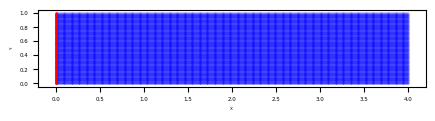

Streaming output truncated to the last 5000 lines.
Iter: 13 Loss: -2.148507357e+00 Energy: -2.148507357e+00 Boundary: 0.000000000e+00 Time: 1.099e-02
Iter: 13 Loss: -2.148519754e+00 Energy: -2.148519754e+00 Boundary: 0.000000000e+00 Time: 1.246e-02
Iter: 13 Loss: -2.148529291e+00 Energy: -2.148529291e+00 Boundary: 0.000000000e+00 Time: 1.059e-02
Iter: 13 Loss: -2.148541451e+00 Energy: -2.148541451e+00 Boundary: 0.000000000e+00 Time: 1.079e-02
Iter: 13 Loss: -2.148555994e+00 Energy: -2.148555994e+00 Boundary: 0.000000000e+00 Time: 1.055e-02
Iter: 13 Loss: -2.148565769e+00 Energy: -2.148565769e+00 Boundary: 0.000000000e+00 Time: 1.063e-02
Iter: 13 Loss: -2.148584366e+00 Energy: -2.148584366e+00 Boundary: 0.000000000e+00 Time: 1.105e-02
Iter: 13 Loss: -2.148601532e+00 Energy: -2.148601532e+00 Boundary: 0.000000000e+00 Time: 1.067e-02
Iter: 13 Loss: -2.148624659e+00 Energy: -2.148624659e+00 Boundary: 0.000000000e+00 Time: 1.058e-02
Iter: 13 Loss: -2.148652554e+00 Energy: -2.148652554e+00 B

In [ ]:
L = 4
H = 1
E = 1000
nu = 0.3
N_H = 100
N_L = 400
t = [0, -12.5]
test_x = 500
test_y = 300

dem = TwoDBeam(L, H, E, nu, t, N_H, N_L, c=100, c1=630, c2=-1.2, epochs=50, num_test_x=test_x, num_test_y=test_y)
dem.train_model()

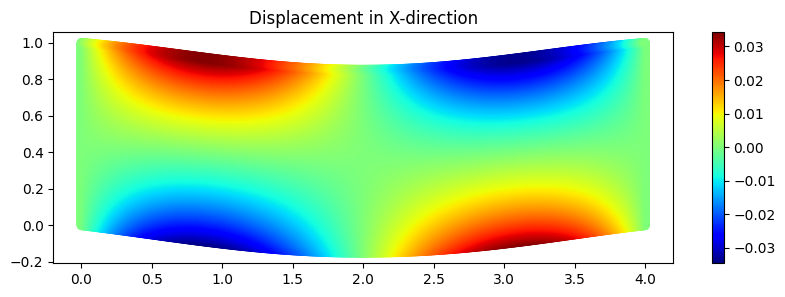

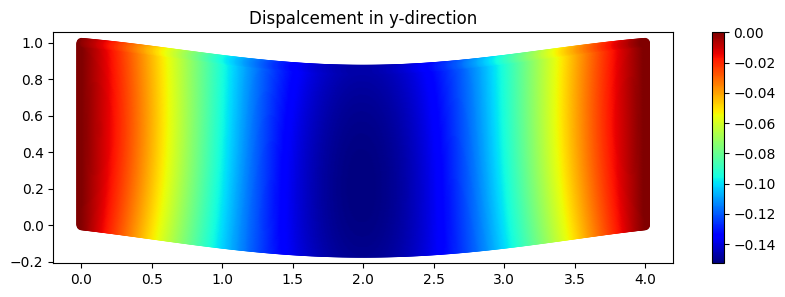

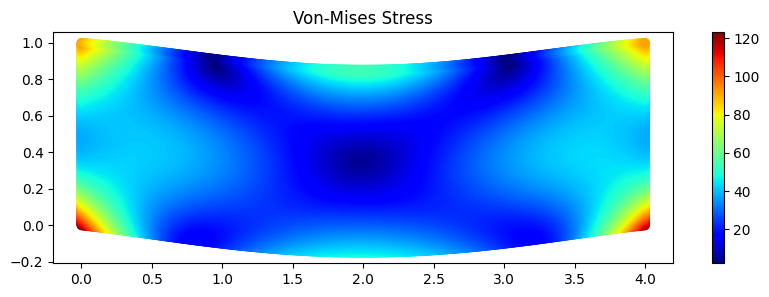

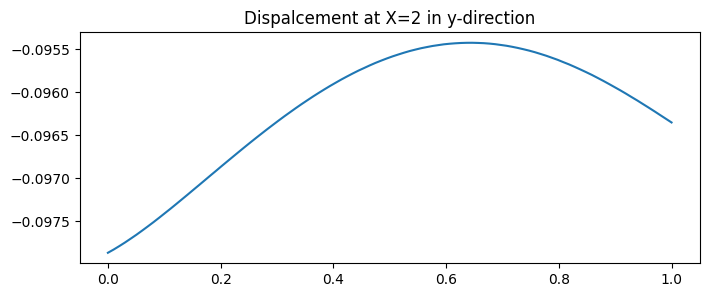

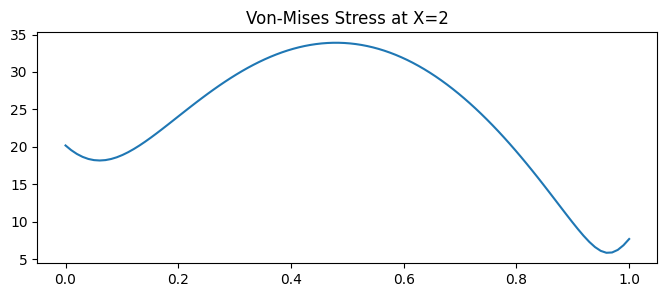

In [ ]:
dem.plot_deformed_displacement()

(40000, 2)


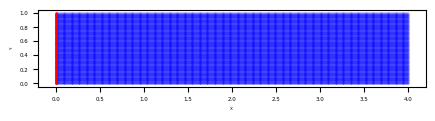

Constructor: IntegrationLoss  trapezoidal  in  2  dimension 
Iter: 1 Loss: 1.297111988e+01 Energy: 1.297111988e+01 Boundary: 0.000000000e+00 Time: 8.250e-01
Iter: 1 Loss: 9.807266235e+00 Energy: 9.807266235e+00 Boundary: 0.000000000e+00 Time: 3.352e-01
Iter: 1 Loss: 8.013307571e+00 Energy: 8.013307571e+00 Boundary: 0.000000000e+00 Time: 2.590e-01
Iter: 1 Loss: 6.409705162e+00 Energy: 6.409705162e+00 Boundary: 0.000000000e+00 Time: 3.368e-01
Iter: 1 Loss: 5.078811169e+00 Energy: 5.078811169e+00 Boundary: 0.000000000e+00 Time: 2.768e-01
Iter: 1 Loss: 4.029180527e+00 Energy: 4.029180527e+00 Boundary: 0.000000000e+00 Time: 3.522e-01
Iter: 1 Loss: 3.181709290e+00 Energy: 3.181709290e+00 Boundary: 0.000000000e+00 Time: 3.156e-01
Iter: 1 Loss: 2.487066984e+00 Energy: 2.487066984e+00 Boundary: 0.000000000e+00 Time: 4.924e-01
Iter: 1 Loss: 1.913566113e+00 Energy: 1.913566113e+00 Boundary: 0.000000000e+00 Time: 5.397e-01
Iter: 1 Loss: 1.438718200e+00 Energy: 1.438718200e+00 Boundary: 0.000000000

In [ ]:
L = 4
H = 1
E = 1000
nu = 0.3
N_H = 100
N_L = 400
t = [0, -12.5]
test_x = 500
test_y = 300

dem = TwoDBeam(L, H, E, nu, t, N_H, N_L, c=100, c1=630, c2=-1.2, epochs=50, num_test_x=test_x, num_test_y=test_y)
dem.train_model()

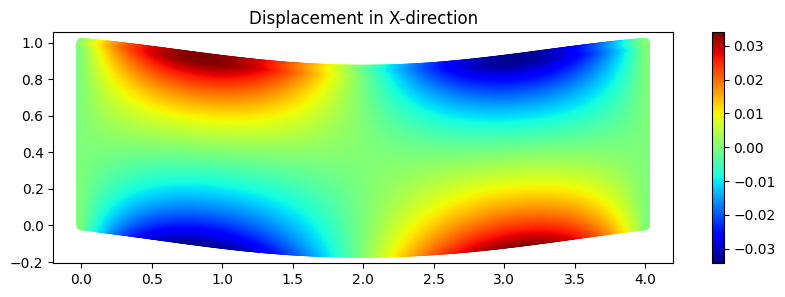

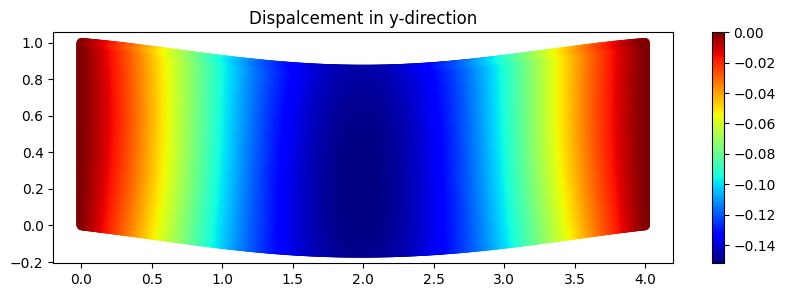

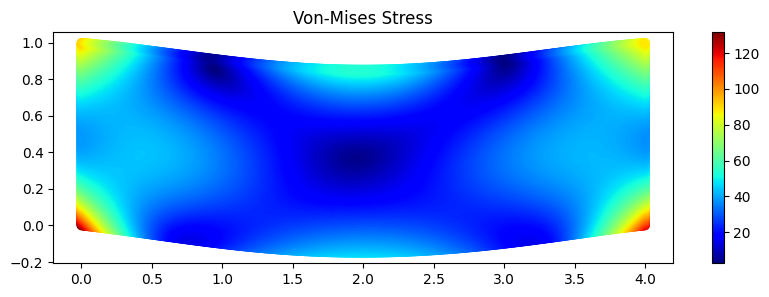

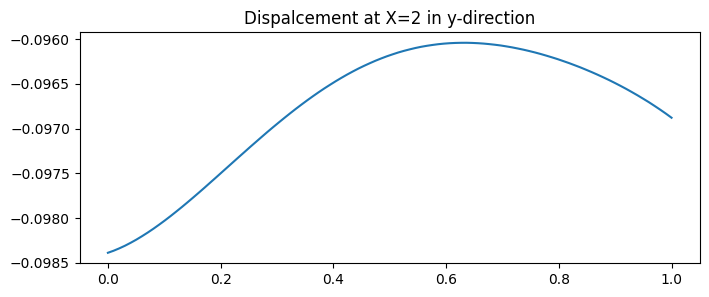

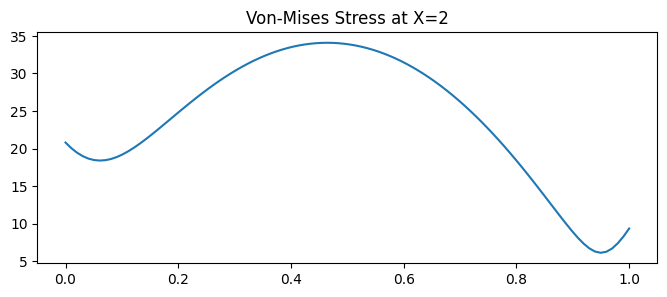

In [ ]:
dem.plot_deformed_displacement()

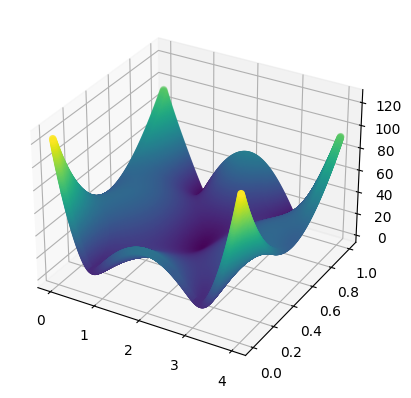

In [ ]:
X = dem.datatest
Nx = dem.num_test_x
Ny = dem.num_test_y
ux = np.reshape(dem.surUx, (Nx*Ny, 1))
uy = np.reshape(dem.surUy, (Nx*Ny, 1))
u = np.concatenate([ux, uy], axis=1)
X_new = X + u
s_von_mises = np.reshape(dem.SVonMises, (Nx*Ny,))

ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], s_von_mises,c=s_von_mises, cmap='viridis')

In [ ]:
!pip install colorspacious

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


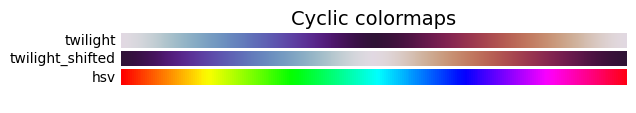

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list


plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

In [ ]:
dem.datatest[251, 0]

2.012024048096192

In [ ]:
with open('/content/drive/MyDrive/Finer_mesh.txt', 'r') as file:

  fp = file.readlines()

fp.split('\n')

AttributeError: ignored

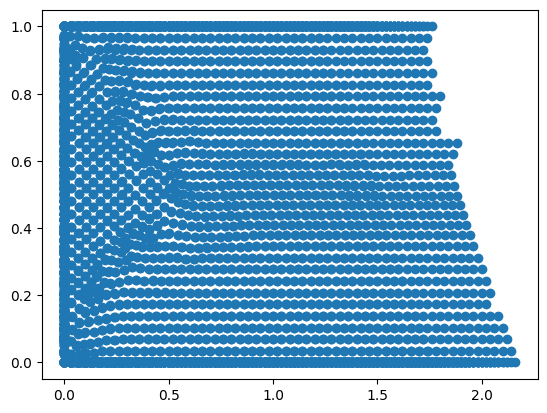

In [ ]:
plt.scatter(x, y)

In [ ]:
X = []
Y = []
Z = []
uy = []
VonMises = []

for i in range(8, len(fp)):

  ls = fp[i].split(' ')
  rls = []
  for element in ls:
    if element != '':
      rls.append(element)

  if len(rls) ==7:
    X.append(rls[0])
    Y.append(rls[1])
    Z.append(rls[2])
    VonMises.append(rls[3])
    uy.append(rls[-1])
  

  

In [ ]:
Uy = [el[:-1] for el in uy]
Uy

In [ ]:
X_i = [float(x) for x in X]
Z_i = [float(z) for z in Z]
uy_i = [float(uyy) for uyy in uy]
vm = [float(vmi) for vmi in VonMises]

In [ ]:
x, y, vonmises = np.array(X_i), np.array(Z_i), np.array(vm)
x.shape, y.shape, vonmises.shape

((6163,), (6163,), (6163,))

In [ ]:
arr = np.array([1, 0, 2, 0, 3, 0, 4, 5, 0])
zero_indices = np.where(arr == 0)

print(zero_indices)

(array([1, 3, 5, 8]),)


In [ ]:
x_4 = [4-xx for xx in x]


In [ ]:
x = np.concatenate([x, x_4], axis=0)

In [ ]:
y = np.concatenate([y, y], axis=0)

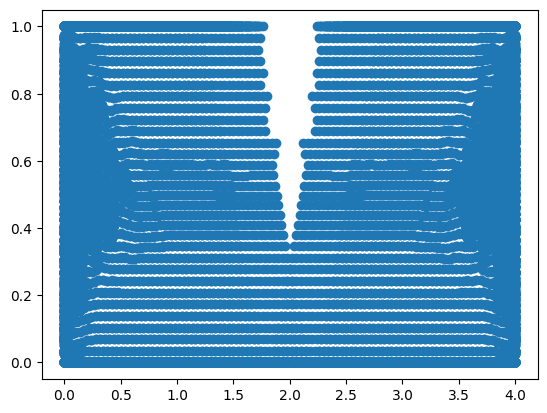

In [ ]:
plt.scatter(x, y)

In [ ]:
vonmises = np.concatenate([vonmises,vonmises], axis=0)
uy = np.concatenate([uy, uy], axis=0)

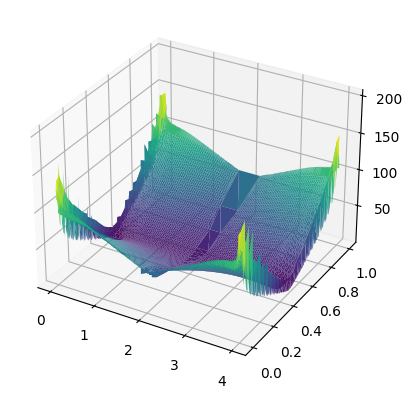

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, vonmises,  cmap='viridis', linewidth=0.5)